# Supervised Learning using the SKLearn Library

In these labs, you will be learning how to perform end-to-end training and evaluation of machine learning models using the Python SKLearn library. SKLearn provides a set of functions and models that are commonly used in machine learning, and is the 'go to' package in Python. 
These labs are split into two sets (over two days in this block), containing examples and excercises. 

The first set contains 3 notebooks, which are split as follows:

**Day1-Block2-Notebook1**

The purpose of this notebook is to:

    - Import data into a notebook
    - pre-process data (normalisation / encoding / imputation)
    - Model training in SKLearn
    - Metrics for model evaluation
    
**Day1-Block2-Notebook2**

Having familiarised yourself with how to train a model in practice, the second notebook focuses on one of the foundations of machine learning, gradient descent. While the maths/computation here is not strictly necessary for this module, it is useful for understanding the principle of how many machine learning algorithms work, including the Perceptron and Logistic regression (and for Neural Networks in the next block of teaching).
 
**Day1-Block2-Excercises**

Using the knowledge you have gained from notebooks 1 and 2, complete the set of exercises in notebook 3


## Import Data
For this simple example, we will be using part of the Heart Disease dataset from the UCI machine learning repository. The data dictionary, which explains each of the columns, can be found at https://archive.ics.uci.edu/ml/datasets/heart+disease.

Before that, we import the Python libraries that we will be using. We then import the data using *read_csv*. Note that we use the option na_values='?' to convert question marks in the raw data to nan (not a number). If we did not do this, then Python would interpret columns containing '?' as a string, rather than a number.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport

In [2]:
data = pd.read_csv('data.csv', na_values='?')
y = data.NUM   # Y are the labels
X = data.iloc[: , :-1] # X are the features

## Description of the features

In [3]:
X.describe()

,Age,Sex,CP,TRESTBPS,CHOL,FBS,RESTECG,THALACH,EXANG,OLDPEAK,SLOPE,CA,THAL
count,123.000000,123.000000,123.000000,121.000000,123.0,48.000000,122.000000,122.000000,122.000000,117.000000,106.000000,5.000000,71.000000
mean,55.317073,0.918699,3.699187,130.206612,0.0,0.104167,0.360656,121.557377,0.442623,0.653846,1.801887,1.600000,5.788732
std,9.032108,0.274414,0.688726,22.559151,0.0,0.308709,0.590077,25.977438,0.498745,1.056061,0.623658,0.547723,1.731354
min,32.000000,0.000000,1.000000,80.000000,0.0,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,1.000000,3.000000
25%,51.000000,1.000000,4.000000,115.000000,0.0,0.000000,0.000000,104.250000,0.000000,0.000000,1.000000,1.000000,3.000000
50%,56.000000,1.000000,4.000000,125.000000,0.0,0.000000,0.000000,121.000000,0.000000,0.300000,2.000000,2.000000,7.000000
75%,61.500000,1.000000,4.000000,145.000000,0.0,0.000000,1.000000,140.000000,1.000000,1.500000,2.000000,2.000000,7.000000
max,74.000000,1.000000,4.000000,200.000000,0.0,1.000000,2.000000,182.000000,1.000000,3.700000,3.000000,2.000000,7.000000


## Or we could use **pandas profiling tool** to explore the data, e.g., the distribution of each feature, missing data etc.

In [4]:
profile = ProfileReport(data, title="Profiling Report")
profile.to_notebook_iframe() # Writes the report in the notebook
#profile.to_file(output_file='output.html') # This creates and html file with the report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Do you spot any issues using the above report?

## Pre-process data
The code below pre-processes the data in the following ways.

1.) Encoding any of the categorical variables using one-hot encoding

2.) Appropriate imputation of missing data

3.) Splitting the data into a training and test set

4.) Data normalisation


In [5]:
# View the data first
X.head

<bound method NDFrame.head of      Age  Sex  CP  TRESTBPS  CHOL  FBS  RESTECG  THALACH  EXANG  OLDPEAK  \
0     32    1   1      95.0     0  NaN      0.0    127.0    0.0      0.7   
1     34    1   4     115.0     0  NaN      NaN    154.0    0.0      0.2   
2     35    1   4       NaN     0  NaN      0.0    130.0    1.0      NaN   
3     36    1   4     110.0     0  NaN      0.0    125.0    1.0      1.0   
4     38    0   4     105.0     0  NaN      0.0    166.0    0.0      2.8   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
118   70    1   4     115.0     0  0.0      1.0     92.0    1.0      0.0   
119   70    1   4     140.0     0  1.0      0.0    157.0    1.0      2.0   
120   72    1   3     160.0     0  NaN      2.0    114.0    0.0      1.6   
121   73    0   3     160.0     0  0.0      1.0    121.0    0.0      0.0   
122   74    1   2     145.0     0  NaN      1.0    123.0    0.0      1.3   

     SLOPE   CA  THAL  
0      1.0  NaN   NaN  
1      1.

view the output labels too. In this case we've plotted the data as a histogram, and we can see that there are 5 categories of output. As we are trying to classify into more than two categories, we will be using extensions to the Perceptron (one vs all) and Logistic Regression (softmax regression). The SKLearn library automatically applies these extensions

In [6]:
%matplotlib inline 

<Axes: >

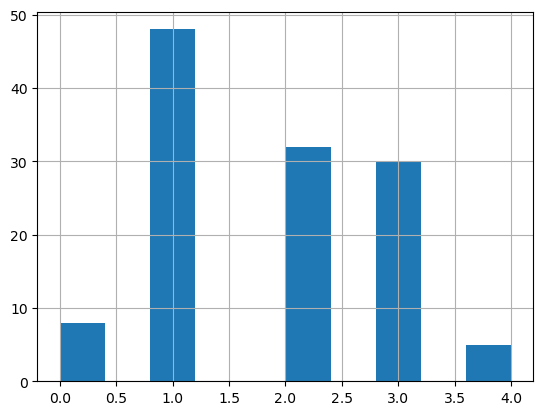

In [7]:
y.hist()

## Could you create a better plot of y?

In [8]:
#y.value_counts().plot(kind='bar') # better plotting for count data

## One hot encoding for categorical variables

In [9]:
# Encode categorical variables - we need to do this for categorical variables coded as multiple numbers, as the
# value of the number has no meaning

#encode the CP variable, which takes values 1-4
CP_onehot = pd.get_dummies(X.CP,prefix='CP') # create the one hot encoded variables
X = pd.concat([X, CP_onehot], axis=1) # add the encoded variable back into the dataframe
X

,Age,Sex,CP,TRESTBPS,CHOL,FBS,RESTECG,THALACH,EXANG,OLDPEAK,SLOPE,CA,THAL,CP_1,CP_2,CP_3,CP_4
0,32,1,1,95.0,0,NaN,0.0,127.0,0.0,0.7,1.0,NaN,NaN,1,0,0,0
1,34,1,4,115.0,0,NaN,NaN,154.0,0.0,0.2,1.0,NaN,NaN,0,0,0,1
2,35,1,4,NaN,0,NaN,0.0,130.0,1.0,NaN,NaN,NaN,7.0,0,0,0,1
3,36,1,4,110.0,0,NaN,0.0,125.0,1.0,1.0,2.0,NaN,6.0,0,0,0,1
4,38,0,4,105.0,0,NaN,0.0,166.0,0.0,2.8,1.0,NaN,NaN,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,70,1,4,115.0,0,0.0,1.0,92.0,1.0,0.0,2.0,NaN,7.0,0,0,0,1
119,70,1,4,140.0,0,1.0,0.0,157.0,1.0,2.0,2.0,NaN,7.0,0,0,0,1
120,72,1,3,160.0,0,NaN,2.0,114.0,0.0,1.6,2.0,2.0,NaN,0,0,1,0
121,73,0,3,160.0,0,0.0,1.0,121.0,0.0,0.0,1.0,NaN,3.0,0,0,1,0


In [10]:
X.drop(['CP'], axis=1) # remove the original variable

,Age,Sex,TRESTBPS,CHOL,FBS,RESTECG,THALACH,EXANG,OLDPEAK,SLOPE,CA,THAL,CP_1,CP_2,CP_3,CP_4
0,32,1,95.0,0,NaN,0.0,127.0,0.0,0.7,1.0,NaN,NaN,1,0,0,0
1,34,1,115.0,0,NaN,NaN,154.0,0.0,0.2,1.0,NaN,NaN,0,0,0,1
2,35,1,NaN,0,NaN,0.0,130.0,1.0,NaN,NaN,NaN,7.0,0,0,0,1
3,36,1,110.0,0,NaN,0.0,125.0,1.0,1.0,2.0,NaN,6.0,0,0,0,1
4,38,0,105.0,0,NaN,0.0,166.0,0.0,2.8,1.0,NaN,NaN,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,70,1,115.0,0,0.0,1.0,92.0,1.0,0.0,2.0,NaN,7.0,0,0,0,1
119,70,1,140.0,0,1.0,0.0,157.0,1.0,2.0,2.0,NaN,7.0,0,0,0,1
120,72,1,160.0,0,NaN,2.0,114.0,0.0,1.6,2.0,2.0,NaN,0,0,1,0
121,73,0,160.0,0,0.0,1.0,121.0,0.0,0.0,1.0,NaN,3.0,0,0,1,0


## Impute missing data

We'll next determine which features contain missing data (also show in profiler report above), and look at the distributions of the non-missing data for these features.

While there are sophisticated ways of dealing with missing data, we will assign the any missing numbers to modal value for each feature. **What do you think the problems are with this approach?**

**note that it is more appropriate to first split the data into train/test, and then to impute any missing numbers in the training set (and apply the same approach to the test set - why is this a more appropriate approach?**


In [11]:
 X.isna().sum()

Age           0
Sex           0
CP            0
TRESTBPS      2
CHOL          0
FBS          75
RESTECG       1
THALACH       1
EXANG         1
OLDPEAK       6
SLOPE        17
CA          118
THAL         52
CP_1          0
CP_2          0
CP_3          0
CP_4          0
dtype: int64

In [12]:
cols = ["TRESTBPS", "FBS","RESTECG","THALACH","EXANG","OLDPEAK","SLOPE","CA","THAL"]
X[cols]=X[cols].fillna(X.mode().iloc[0])
X.head

<bound method NDFrame.head of      Age  Sex  CP  TRESTBPS  CHOL  FBS  RESTECG  THALACH  EXANG  OLDPEAK  \
0     32    1   1      95.0     0  0.0      0.0    127.0    0.0      0.7   
1     34    1   4     115.0     0  0.0      0.0    154.0    0.0      0.2   
2     35    1   4     115.0     0  0.0      0.0    130.0    1.0      0.0   
3     36    1   4     110.0     0  0.0      0.0    125.0    1.0      1.0   
4     38    0   4     105.0     0  0.0      0.0    166.0    0.0      2.8   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
118   70    1   4     115.0     0  0.0      1.0     92.0    1.0      0.0   
119   70    1   4     140.0     0  1.0      0.0    157.0    1.0      2.0   
120   72    1   3     160.0     0  0.0      2.0    114.0    0.0      1.6   
121   73    0   3     160.0     0  0.0      1.0    121.0    0.0      0.0   
122   74    1   2     145.0     0  0.0      1.0    123.0    0.0      1.3   

     SLOPE   CA  THAL  CP_1  CP_2  CP_3  CP_4  
0      1.

In [13]:
X.mode().iloc[0]

Age          61.0
Sex           1.0
CP            4.0
TRESTBPS    115.0
CHOL          0.0
FBS           0.0
RESTECG       0.0
THALACH     120.0
EXANG         0.0
OLDPEAK       0.0
SLOPE         2.0
CA            2.0
THAL          7.0
CP_1          0.0
CP_2          0.0
CP_3          0.0
CP_4          1.0
Name: 0, dtype: float64

## split into training and test data

In [14]:
# split the dataset into training + testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# setting the random_state to a fixed values means that the split between train and test is consistent between runs.
# This is useful to check that our code is running properly, but we might want to remove if we were checking variability (for instance) over multiple runs

In [15]:
# Data normalisation (multiple options in sklearn, we will use StandardScaler)
from sklearn.preprocessing import StandardScaler # Standardize features by removing the mean and scaling to unit variance.
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
scaler.mean_ #show the means for each column

array([5.57195122e+01, 9.02439024e-01, 3.70731707e+00, 1.33658537e+02,
       0.00000000e+00, 3.65853659e-02, 3.53658537e-01, 1.22085366e+02,
       4.87804878e-01, 6.43902439e-01, 1.85365854e+00, 1.97560976e+00,
       6.18292683e+00, 2.43902439e-02, 3.65853659e-02, 1.46341463e-01,
       7.92682927e-01])

In [17]:
scaler.var_ #show the variances for each column

array([7.80066924e+01, 8.80428316e-02, 4.26531826e-01, 5.49419988e+02,
       0.00000000e+00, 3.52468769e-02, 3.26145152e-01, 7.62931737e+02,
       2.49851279e-01, 9.16365259e-01, 3.44437835e-01, 2.37953599e-02,
       2.49092802e+00, 2.37953599e-02, 3.52468769e-02, 1.24925640e-01,
       1.64336704e-01])

## Model Training
We will train two models that were introduced in the lectures, a logistic regression and a perceptron.
### Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

### Perceptron


In [19]:
from sklearn.linear_model import Perceptron
model = Perceptron(tol=1e-3, random_state=0)
model.fit(X_train, y_train)

Perceptron()

## Model Evaluation

We will evaluate the two models using accuracy (the percentage of correct classifications)

In [20]:
score = logreg.score(X_test,y_test)
print(score)

0.3170731707317073


In [21]:
from sklearn.metrics import accuracy_score
y_pred = logreg.predict(X_test)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[0 2 0 1 0]
 [0 8 3 4 0]
 [0 4 3 4 0]
 [0 6 0 2 0]
 [0 1 3 0 0]]


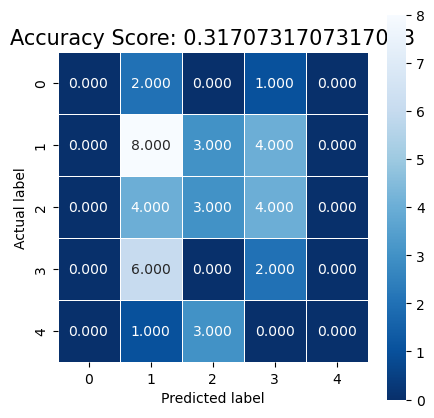

In [22]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

## Sensitivity and Specificity

In the lectures, we showed how to calculate sensitivity and specificity. These require us to calculate 'True Positives', 'True Negatives', 'False Positives' and 'False Negatives'. These do not readily apply to multiclass classification problems, but we *can* consider each class in turn (in a one vs all way). Doing so will give us a 2x2 confusion matrix for each class:

In [23]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_test, y_pred)

array([[[38,  0],
        [ 3,  0]],

       [[13, 13],
        [ 7,  8]],

       [[24,  6],
        [ 8,  3]],

       [[24,  9],
        [ 6,  2]],

       [[37,  0],
        [ 4,  0]]])